In [1]:

#Load Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import input data
data = pd.read_csv('../input/hiring.csv')


In [3]:
#Data Preparation
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


In [4]:
#Check which columns has NULL values
data.isna().any()


experience                     True
test_score(out of 10)          True
interview_score(out of 10)    False
salary($)                     False
dtype: bool

In [5]:
#Replace NAN with "zero"
data['experience'].fillna(0,inplace=True)
data['test_score(out of 10)'].fillna(np.mean(data['test_score(out of 10)']),inplace=True)
x = data.drop('salary($)',axis=1)
y = data['salary($)']
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


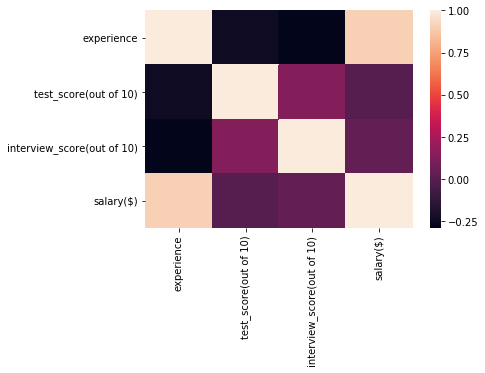

In [6]:
#Visualizing data
sns.heatmap(data.corr())

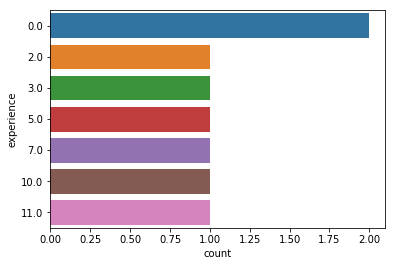

In [7]:
sns.countplot(y = 'experience' ,data=data)

In [8]:
#Train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [9]:
#Tain the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
#Test the model
y_pred = lr.predict(x_test)
y_pred

array([77818.23189204, 57496.5574222 ])

In [11]:
y_test

6    72000
2    60000
Name: salary($), dtype: int64

In [12]:

#Calculate residuals
from sklearn import metrics
#Mean Absolute Error
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
#Mean square error
print("MSE",metrics.mean_squared_error(y_test,y_pred))
#Root Mean Squared error
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 4160.837234921506
MSE 20059523.54495668
RMSE 4478.785945427252
